<a href="https://colab.research.google.com/github/mortezam13/mnist1/blob/main/covid_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 Detection


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/train',labels='inferred',class_names=['NORMAL','PNEUMONIA'],validation_split=0.3,subset='training',seed=3,color_mode='grayscale')
val_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/train',labels='inferred',class_names=['NORMAL','PNEUMONIA'],validation_split=0.3,subset='validation',seed=3,color_mode='grayscale')

Found 148 files belonging to 2 classes.
Using 104 files for training.
Found 148 files belonging to 2 classes.
Using 44 files for validation.


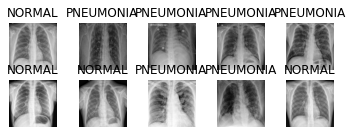

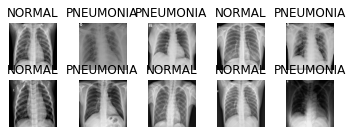

In [ ]:
class_names = ['NORMAL','PNEUMONIA']
for images, labels in train_ds.take(2):
  plt.figure()
  for i in range(10):  #we want to plot <n> images(n<batch_size)
    plt.subplot(4,5,i+1)
    plt.imshow(images[i].numpy().squeeze(), cmap = 'gray')
    plt.title(class_names[labels[i]]) #Set the title to <i>th image's label
    plt.axis('off')

In [ ]:
EPOCHS = 10

model = Sequential(
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(64 ,)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (64 ,)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu', input_shape = (64 ,)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(units = 512, activation = 'relu'))
model.add(layers.Dense(units = 1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',  metrics = ['acc'])


#model.summary()

train_hist1 = model.fit( train_ds, validation_data=val_ds,epochs=10,)

Epoch 1/10
4/4 [==============================] - 16s 3s/step - loss: 1.5681 - acc: 0.5000 - val_loss: 0.6681 - val_acc: 0.5000
Epoch 2/10
4/4 [==============================] - 15s 3s/step - loss: 0.6595 - acc: 0.5000 - val_loss: 0.6201 - val_acc: 0.5000
Epoch 3/10
4/4 [==============================] - 15s 3s/step - loss: 0.4840 - acc: 0.7115 - val_loss: 0.3126 - val_acc: 0.8864
Epoch 4/10
4/4 [==============================] - 15s 3s/step - loss: 0.3279 - acc: 0.8462 - val_loss: 0.4798 - val_acc: 0.7500
Epoch 5/10
4/4 [==============================] - 15s 3s/step - loss: 0.3785 - acc: 0.8462 - val_loss: 0.2824 - val_acc: 0.8864
Epoch 6/10
4/4 [==============================] - 15s 3s/step - loss: 0.2628 - acc: 0.9038 - val_loss: 0.2189 - val_acc: 0.9318
Epoch 7/10
4/4 [==============================] - 15s 3s/step - loss: 0.2145 - acc: 0.8942 - val_loss: 0.1623 - val_acc: 0.9318
Epoch 8/10
4/4 [==============================] - 15s 3s/step - loss: 0.0970 - acc: 0.9615 - val_loss: 0

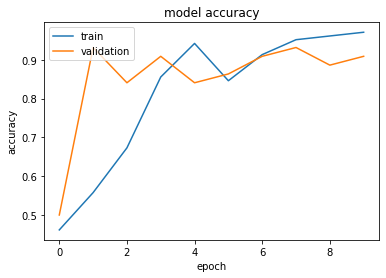

In [ ]:
plt.plot(train_hist1.history['acc'])
plt.plot(train_hist1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()